In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics

In [2]:
df = pd.read_csv('audi.csv')

In [3]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [4]:
print(df.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [6]:
df_onehot = pd.get_dummies(df,columns=['model', 'transmission','fuelType'])

In [11]:

#skewness and kurtosis
print("Skewness: " + str(df_onehot['price'].skew()))
print("Kurtosis: " + str(df_onehot['price'].kurt()))

Skewness: 2.2773230863659157
Kurtosis: 11.671631906714016


In [12]:
from sklearn.model_selection import train_test_split
X = df_onehot.drop(['price'], axis = 1)
y = df_onehot['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 25)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
reg = LinearRegression()
lr = RandomForestRegressor(n_estimators =50)
lr.fit(X_train, y_train)
reg.fit(X_train, y_train)
print('LinearRegression Test score: {}'.format(reg.score(X_test,y_test)))
print('RandomForestRegressor Test score: {}'.format(lr.score(X_test,y_test)))
print('LinearRegression Train score: {}'.format(reg.score(X_train,y_train)))
print('RandomForestRegressor Train score: {}'.format(lr.score(X_train,y_train)))

LinearRegression Test score: 0.8863617719327825
RandomForestRegressor Test score: 0.9625073430939134
LinearRegression Train score: 0.893873349000129
RandomForestRegressor Train score: 0.9932614056472201


In [38]:
y_predlr = lr.predict(X_test)
y_predreg = reg.predict(X_test)

<ErrorbarContainer object of 3 artists>

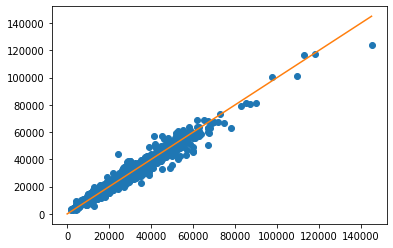

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, y_predlr, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

<ErrorbarContainer object of 3 artists>

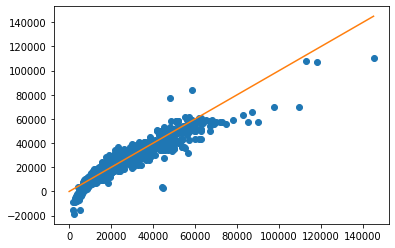

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, y_predreg, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])